In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
training_data = np.loadtxt('data4/training_data.txt', dtype=np.int32)  # 载入数据
test_data = np.loadtxt('data4/test_data.txt', dtype=np.int32)

In [3]:
num = []
for i in range(training_data.shape[1]):
    num.append(training_data[:, i].max())
num

[2, 4, 3, 3, 2, 1, 2, 2, 4]

In [226]:
def cal_prob(data):
    m, n = data.shape
    # print(training_data.shape)

    p_1, p_2 = [], []
    pred = data[:, -1]
    for i in range(num[-1]+1):   # 每种预测结果
        p_1.append((pred == i).sum() / m) # 该种预测结果的概率
        temp_1 = []
        for j in range(n):   # n-1种影响因素
            temp_2 = []
            temp_data = np.array([data[:, j][k] for k in range(m) if pred[k] == i])
            for k in range(num[j]+1):
                if (pred == i).sum() != 0:
                    temp_2.append((temp_data == k).sum() / (pred == i).sum())
                else:
                    temp_2.append(0)
            temp_1.append(temp_2)
        p_2.append(temp_1)
    return p_1, p_2

In [227]:
def pred(train_data, test_data):
    p_1, p_2 = cal_prob(train_data)
    # print(p_1, p_2)
    m, n = test_data.shape
    cnt = 0
    for i in range(m):
        temp = []
        for j in range(test_data[:, -1].min(), test_data[:, -1].max()+1):
            pred_p = p_1[j]
            for k in range(n):
                pred_p *= p_2[j][k][test_data[i][k]]
            temp.append(pred_p)
        if temp.index(max(temp)) == test_data[i][-1]:
            cnt += 1
    return cnt / m

In [228]:
res = pred(training_data, test_data)

In [229]:
def get_train_data(training_data, prob=1):
    temp = training_data.copy()
    np.random.shuffle(temp)
    return temp[:int(prob*temp.shape[0])]

In [230]:
train_1 = get_train_data(training_data, prob=0.5)
train_2 = get_train_data(training_data, prob=0.01)
train_3 = get_train_data(training_data, prob=0.005)
train_4 = get_train_data(training_data, prob=0.001)

In [231]:
res_1 = pred(train_1, test_data)
res_2 = pred(train_2, test_data)
res_3 = pred(train_3, test_data)
res_4 = pred(train_4, test_data)

In [232]:
print(res_1)
print(res_2)
print(res_3)
print(res_4)

0.9996621621621622
0.9753378378378378
0.8138513513513513
0.3533783783783784


In [233]:
x = np.arange(0, 5)
y = np.array([res, res_1, res_2, res_3, res_4])

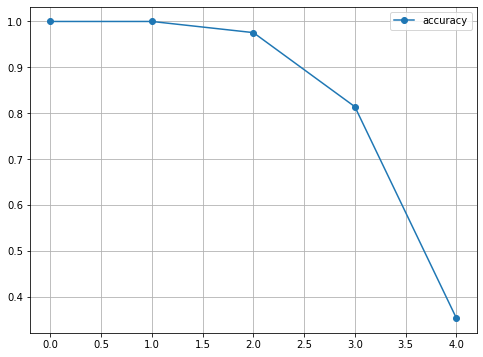

In [235]:
plt.figure(figsize=(8, 6))
plt.plot(x, y, marker='o', label='accuracy')
plt.grid()
plt.legend()
plt.show()